In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
from langchain_teddynote import logging
logging.langsmith("CH21-AGENT")

LangSmith 추적을 시작합니다.
[프로젝트명]
CH21-AGENT


# React Agent 

In [3]:
import json
from langchain_openai import ChatOpenAI
from langchain_teddynote.tools.tavily import TavilySearch
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import create_react_agent

## 메모리 설정 

In [4]:
# 메모리 설정
memory = MemorySaver()

# 모델 설정
model = ChatOpenAI(model_name="gpt-4o-mini", temperature=0)

## 도구 설정 
### 웹 검색 

In [5]:
web_search = TavilySearch(
    topic="general",  # 뉴스 주제 (general 또는 news)
    include_domains=["google.com"],
    max_results=5,  # 최대 검색 결과
    include_answer=False,
    include_raw_content=False,
    include_images=False,
    format_output=False,
)

web_search.name = "web_search"
web_search.description = (
    "Use this tool to search on the web for any topic other than news."
)

In [6]:
result = web_search.search("AI 관련된 최신 뉴스를 검색해줘")
result

[{'title': 'The Prompt: 최근 AI 관련 사건에 대한 논의 - Google Cloud',
  'url': 'https://cloud.google.com/blog/transform/ko/prompt-lets-talk-about-recent-ai-missteps',
  'content': "비즈니스 리더들 사이에서 생성형 AI가 큰 관심을 모으고 있습니다. 매주 'The Prompt'는 빠르게 변화하는 이 주제에 대한 최신 정보를 놓치지 않도록 고객 및 파트너와의 협업을 통해 얻은 시각과 Google의 최신 AI 트렌드를 전해드립니다. 이번 호에서는 최근 보고된",
  'score': 0.6083387,
  'raw_content': None},
 {'title': '멀티모달로 마무리한 AI의 역사적인 한 해 | Google Cloud 블로그',
  'url': 'https://cloud.google.com/transform/ko/historic-year-for-ai-momentous-multimodal-moment-the-prompt',
  'content': "*본 아티클의 원문은 2023년 12월 21일 Google Cloud 블로그()에 게재되었습니다.비즈니스 리더들 사이에서 생성형 AI가 큰 관심을 끌고 있습니다. 'The Prompt'는 빠르게 변화하는 이 주제에 대한 최신 정보를 놓치지 않도록 고객 및 파트너와 계속 협업하면서 확인한 사항과 Google의 최신 AI 트렌드를 전해",
  'score': 0.4436251,
  'raw_content': None},
 {'title': 'Google 검색에서 AI 개요로 더 쉽고 빠르게 정보 찾기',
  'url': 'https://support.google.com/websearch/answer/14901683?hl=ko',
  'content': '검색 결과의 AI 개요를 사용하면 원하는 정보를 더 빠르고 쉽게 찾을 수 있습니다. AI 개요는 핵심 정보 및 더 자세히 살펴볼 수 있는 

### 구글 뉴스 키워드 검색 

In [7]:
from langchain_teddynote.tools import GoogleNews
from langchain.tools import tool
from typing import List, Dict

In [8]:
# 키워드로 뉴스 검색하는 도구 정의 
@tool
def search_news_by_keyword(query: str) -> List[Dict[str, str]]:
    """Look up news by keyword"""
    print(query)
    news_tool = GoogleNews()
    return news_tool.search_by_keyword(query, k=10)

In [9]:
search_news_by_keyword.invoke("AI 관련된 최신 뉴스를 검색해줘")

AI 관련된 최신 뉴스를 검색해줘


[{'url': 'https://news.google.com/rss/articles/CBMiRkFVX3lxTFBDeDQwSFQwTEM5ZW1VV09TTUR0TDZLLWUxUjNMSkJNY1BtLUNLTHV0OXk4SVBUWjdYaGFfazFyUmhScVFtdlE?oc=5',
  'content': 'Perplexity AI: AI 검색 엔진의 혁신 - 브런치'},
 {'url': 'https://news.google.com/rss/articles/CBMiVkFVX3lxTE41elhUcXRaa3BsUE5NS1pDYUozWFZab3JtdHZ0QXFwWTdyY21yV0dfblk3REZPeW90NVBodklQUTlHWk9Ud3Y5aTlFTXFidW4zUUJsZG1B?oc=5',
  'content': '삼성·LG전자 IF 디자인상 싹쓸이…삼성 ‘볼리’·LG ‘올레드 T’ 금상 - 매일경제'},
 {'url': 'https://news.google.com/rss/articles/CBMiREFVX3lxTE5aYVdLTXB6ckNNbWpNT1pNYTAza1VNZ0tfNzFEaFJyQ0g0Yl8zaUhERWtDb0Vxd3hZS1lHcUpJN29jbXZq?oc=5',
  'content': '젠스파크(Genspark) AI와 함께하는 뉴스 브리핑 - 브런치'},
 {'url': 'https://news.google.com/rss/articles/CBMiVEFVX3lxTE5wb3RLNGFXWUliRkdOT0U0Z2dRTW5wTXpOdXNCNndVVUFRRlM1MGVid3dva3ltTUlsbGx0dzBZblN3cFNqR2JXc0ZYVDVFNWhuS2p1Mw?oc=5',
  'content': '지갑 두고 갔대서 열어줬더니…중년 男女, 불 꺼진 코인노래방서 성행위 - 매일경제'},
 {'url': 'https://news.google.com/rss/articles/CBMiVkFVX3lxTFBTQ3Z5RldTa0gtQW1rVEQ5cmh3UHpkeHVwMzU0WmhWR2NwRHUxb1

### 파일 관리

In [13]:
from langchain_community.agent_toolkits import FileManagementToolkit
from langchain_community.document_loaders import PDFPlumberLoader
from langchain_core.documents import Document

In [11]:
# 작업 디렉토리 설정
working_directory = "temp"

# FileManagementToolkit 객체 생성
file_management_tools = FileManagementToolkit(
    root_dir=str(working_directory),
).get_tools()

In [12]:
file_management_tools

[CopyFileTool(root_dir='temp'),
 DeleteFileTool(root_dir='temp'),
 FileSearchTool(root_dir='temp'),
 MoveFileTool(root_dir='temp'),
 ReadFileTool(root_dir='temp'),
 WriteFileTool(root_dir='temp'),
 ListDirectoryTool(root_dir='temp')]

In [14]:
@tool
def load_pdf(file_path: str) -> List[Document]:
    """Use this tool to load a PDF file and return the content"""
    loader = PDFPlumberLoader(file_path)
    return loader.load()

In [15]:
# 도구 목록 정의 
tools = [web_search, search_news_by_keyword, *file_management_tools, load_pdf]
tools

[TavilySearch(name='web_search', description='Use this tool to search on the web for any topic other than news.', client=<tavily.tavily.TavilyClient object at 0x10d1fb050>, include_domains=['google.com'], max_results=5, include_raw_content=False),
 StructuredTool(name='search_news_by_keyword', description='Look up news by keyword', args_schema=<class 'langchain_core.utils.pydantic.search_news_by_keyword'>, func=<function search_news_by_keyword at 0x1165b6520>),
 CopyFileTool(root_dir='temp'),
 DeleteFileTool(root_dir='temp'),
 FileSearchTool(root_dir='temp'),
 MoveFileTool(root_dir='temp'),
 ReadFileTool(root_dir='temp'),
 WriteFileTool(root_dir='temp'),
 ListDirectoryTool(root_dir='temp'),
 StructuredTool(name='load_pdf', description='Use this tool to load a PDF file and return the content', args_schema=<class 'langchain_core.utils.pydantic.load_pdf'>, func=<function load_pdf at 0x11734ab60>)]

### Agent 생성 

In [16]:
agent_executor = create_react_agent(model, tools, checkpointer=memory)

정의한 에이전트를 시각화 하여 확인해 보면...

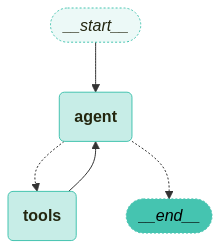

In [17]:
from langchain_teddynote.graphs import visualize_graph

visualize_graph(agent_executor)

### 출력 함수 정의 

In [18]:
def stream_agent(instruction, agent_executor, config, print_tools=False):
    # 질문 입력
    inputs = {"messages": [("human", instruction)]}

    # 동기 스트림 처리(stream_mode="messages")
    # chunk_msg: 실시간 출력 메시지, metadata: 노드 정보
    for chunk_msg, metadata in agent_executor.stream(
        inputs, config, stream_mode="messages"
    ):
        if metadata["langgraph_node"] == "agent":
            if chunk_msg.content:
                print(chunk_msg.content, end="", flush=True)
        elif metadata["langgraph_node"] == "tools":
            if print_tools:
                print(chunk_msg.content)

In [20]:
# Config 설정
config = {"configurable": {"thread_id": "abc123"}}

In [21]:
stream_agent("안녕? 내 이름은 김영희야. 만나서 반가워요.", agent_executor, config)

안녕하세요, 김영희님! 다시 만나서 반갑습니다. 무엇을 도와드릴까요?

In [22]:
config = {"configurable": {"thread_id": "abc123"}}
stream_agent("제가 누구라고 했지요?", agent_executor, config)

김영희님이라고 하셨습니다. 맞나요?

# 결과 확인 
## 뉴스 검색 및 보고서 작성 

In [23]:
instruction = """
다음의 내용을 순서대로 처리해 주세요. 
1. 에이전트 관련된 최신 뉴스를 검색 합니다. 
2. 에이전트 활용방법(LangChain) 에 대한 예제를 조사해 주세요. 
3. 최신 뉴스와 예제를 참고하여 보고서를 작성해 주세요.
4. 작성한 보고서의 내용만 파일로 저장해 주세요. (파일 이름은 agent_report.md 입니다.)
"""

In [24]:
stream_agent(instruction, agent_executor, config, print_tools=True)

에이전트
[{"url": "https://news.google.com/rss/articles/CBMiVkFVX3lxTE9rcXM1N1hJZUVTLURYZ0FNcnJ6MUppR3ZCMW5ZWkVHY0pHd0x2TEtnTFJoaVpRa0lOUDBmWExaVkVtd2xNR1VTdGdwelJvMUNoUEFUTkdR?oc=5", "content": "레드햇 \"AI 에이전트 개발 온프레미스서 돕는 서비스 검토 중\" - ZD넷 코리아"}, {"url": "https://news.google.com/rss/articles/CBMiqAJBVV95cUxQMy1OMGlBMXlRVTFzQ2w5bnFONkdVeXFnWXhFQXJwVHpadldNQldqSENWQjRxY0MtWGxZdm9oZ2tlUTlralRULU51UU83N1hNYU5ob29mY1lEbnMwTEZoLXJucHJMRzZ0QjVTNXBhR2IweHA0NnE2bVpQaXVlUXF1bVJjRUJJQjJveU1VTnp2NFpmdWtNd3RLUHFSVTllOVV0Z0dYVWtqVENKT2FVTHdmcDQ0bkNPUEtyZ3A5cG9KUGtJZ25reTQ3UFNEZ3VZOEY4bE1EdmF0eVNPY1BQdVM2d3laamtsQ1hXTGg5NnVlbXpMaTlNYWNRS3YweC1qNjREckgxWTREa2JWR0xLaTdNRUhDNWNLMDNyMXZwTloxNlp5bEQtbC1pdw?oc=5", "content": "칼럼 | AI 에이전트에 얼마나 준비되어 있는가? - CIO.com"}, {"url": "https://news.google.com/rss/articles/CBMiTkFVX3lxTE9ZUkE2cTdWSTNocmtEMEs5MVk4cW5sM1gteE5IZThnc1dnVUx4eUs4dTdOQjNReUdwMXBDS05sSDdoazE0TDBESFBZVHNiQQ?oc=5", "content": "가트너, “AI 에이전트로 계정 탈취 쉬워진다…해킹 시간 50% 빨라져” - 전자신문"}, {"url": "https://news

## PDF 파일에서 필요 내용 추출/정리

In [25]:
instruction = """
data/SPRi AI Brief_Special_AI Agent_241209_F.pdf 파일을 로드하고, 목차를 출력해 주세요.
"""

In [26]:
stream_agent(instruction, agent_executor, config)

PDF 파일의 목차는 다음과 같습니다:

1. AI 에이전트(AI Agent)의 도입 및 부상
   - AI 에이전트의 정의
   - AI 에이전트의 부상 배경
   - AI 에이전트 시장 전망

2. AI 에이전트 주요 사례
   - Microsoft
   - Google
   - Apple
   - Meta
   - AWS(Amazon Web Services)
   - Salesforce
   - OpenAI
   - NVIDIA

3. AI 에이전트 관련 이슈 및 전망
   - 주요 이슈
     - 기술적 문제
     - 사회적 영향
     - 윤리적 이슈
     - 법적 이슈
   - 향후 전망

4. 참고 문헌

이 목차를 바탕으로 더 궁금한 점이 있으면 말씀해 주세요!

## 목차 생성 

In [ ]:
instruction = """
이전의 작성한 목차를 참고하여 다음의 지시사항을 순서대로 처리하고, 목차를 작성해 주세요.

#지시사항
1. `에이전트` 키워드와 관련된 뉴스를 검색 합니다. 
2. 1번의 내용을 바탕으로 이전에 작성한 "목차"의 형식에 맞게 목차를 작성 합니다. 
3. 완성된 목차를 파일로 저장 합니다. (파일 이름은 "agent_table_of_contents.md")

[IMPORTANT] 목차의 형식은 이전에 작성한 목차를 참고해서 작성 합니다. 
"""

In [28]:
stream_agent(instruction, agent_executor, config, print_tools=True)

에이전트
[{"url": "https://news.google.com/rss/articles/CBMiVkFVX3lxTE9rcXM1N1hJZUVTLURYZ0FNcnJ6MUppR3ZCMW5ZWkVHY0pHd0x2TEtnTFJoaVpRa0lOUDBmWExaVkVtd2xNR1VTdGdwelJvMUNoUEFUTkdR?oc=5", "content": "레드햇 \"AI 에이전트 개발 온프레미스서 돕는 서비스 검토 중\" - ZD넷 코리아"}, {"url": "https://news.google.com/rss/articles/CBMiqAJBVV95cUxQMy1OMGlBMXlRVTFzQ2w5bnFONkdVeXFnWXhFQXJwVHpadldNQldqSENWQjRxY0MtWGxZdm9oZ2tlUTlralRULU51UU83N1hNYU5ob29mY1lEbnMwTEZoLXJucHJMRzZ0QjVTNXBhR2IweHA0NnE2bVpQaXVlUXF1bVJjRUJJQjJveU1VTnp2NFpmdWtNd3RLUHFSVTllOVV0Z0dYVWtqVENKT2FVTHdmcDQ0bkNPUEtyZ3A5cG9KUGtJZ25reTQ3UFNEZ3VZOEY4bE1EdmF0eVNPY1BQdVM2d3laamtsQ1hXTGg5NnVlbXpMaTlNYWNRS3YweC1qNjREckgxWTREa2JWR0xLaTdNRUhDNWNLMDNyMXZwTloxNlp5bEQtbC1pdw?oc=5", "content": "칼럼 | AI 에이전트에 얼마나 준비되어 있는가? - CIO.com"}, {"url": "https://news.google.com/rss/articles/CBMiTkFVX3lxTE9ZUkE2cTdWSTNocmtEMEs5MVk4cW5sM1gteE5IZThnc1dnVUx4eUs4dTdOQjNReUdwMXBDS05sSDdoazE0TDBESFBZVHNiQQ?oc=5", "content": "가트너, “AI 에이전트로 계정 탈취 쉬워진다…해킹 시간 50% 빨라져” - 전자신문"}, {"url": "https://news

--------
** End of Documents **